# **Traffic Sign Recognition using CNN**

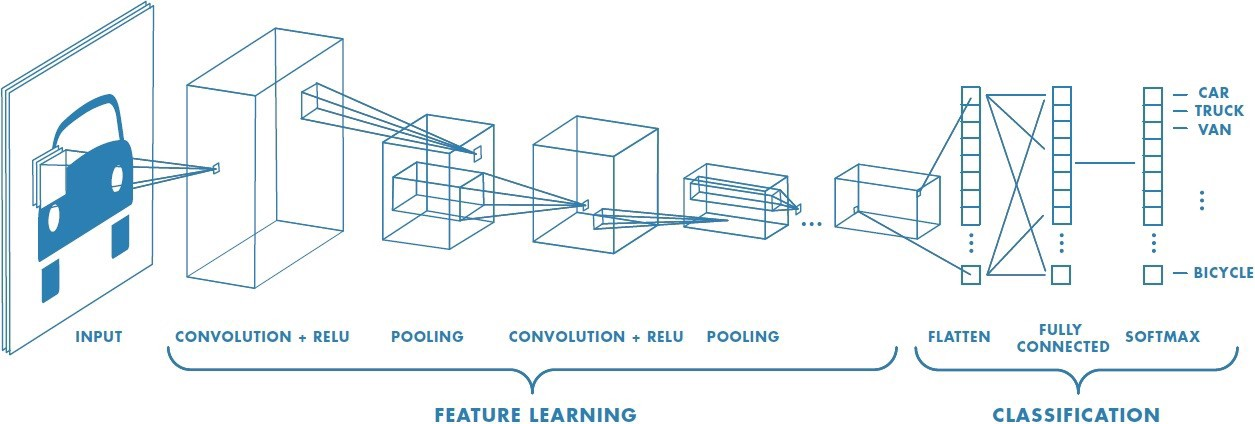

> **TASK** : To classify traffic signs into 43 distinct classes.

# **Dependencies:**

In [13]:
import os
import cv2
import pandas as pd
from numpy import random
from IPython.display import display

# ------------------------------------------------------------------------------------------- #

import seaborn as sns
import matplotlib.pyplot as plt

# ------------------------------------------------------------------------------------------- #

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ------------------------------------------------------------------------------------------- #

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPool2D, Dense

# ------------------------------------------------------------------------------------------- #

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import save_model

# ------------------------------------------------------------------------------------------- #

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# **Doing a quick EDA:**

In [27]:
# Path to raw data
data_path = "____"

# Listing sub directories
sub_directories = os.listdir(data_path)

# Loading labels
labels = pd.read_csv("____")

In [28]:
# Finding number of classes in the data
print("Number of Classes: ",len(sub_directories))

In [29]:
# Finding number of images under each class
no_of_images = []
for directory in sub_directories:
    no_of_images.append(len(os.listdir(os.path.join(data_path, directory))))

labels["n_samples"] = no_of_images
labels.sort_values(["n_samples"], inplace=True)

# Displaying DataFrame containing class name, directory name and number of samples 
display(labels)

In [30]:
# Visualising number of samples under each class
f, ax = plt.subplots(figsize=(20, 7))
sns.barplot(x=labels["Name"], y=labels["n_samples"], palette="deep")
plt.xlabel("CLASS NAME")
plt.ylabel("NUMBER OF SAMPLES")
plt.xticks(rotation=90)
plt.show()

In [31]:
# checking resolution of the images
res = cv2.imread(os.path.join(data_path, sub_directories[0], os.listdir(os.path.join(data_path, sub_directories[0]))[0])).shape
print("Height: ", res[0])
print("Width: ", res[1])
print("Number of Channels: ", res[2])
print("Resolution: {}x{}".format(res[0], res[1]))

In [32]:
# displaying some images randomly from each class
fig = plt.figure(figsize=(40, 30))
rows = 8
cols = 6
for directory in sub_directories:
    current_dir_files = os.listdir(os.path.join(data_path, directory))
    img = cv2.imread(os.path.join(data_path, directory, current_dir_files[random.randint(len(current_dir_files))]))
    fig.add_subplot(rows, cols, int(directory)+1)
    plt.imshow(img)
    plt.title(labels["Name"][int(directory)], fontsize=14)

# **Data Augmentation:**

In [20]:
# Data Generators will augment the data and feed it to our models

train_datagen = ____(
    rescale = 1./255,
    rotation_range = 20,
    zoom_range = 0.2,
    fill_mode = "nearest"
).____(
    "../input/traffic-signs-train-val-split/traffic signs split/train",
    target_size = (32, 32),
    batch_size = 32,
    class_mode = "____"
)


# Validation data need not be augmented
val_datagen = ImageDataGenerator(
    rescale = 1./255
).flow_from_directory(
    "____",
    target_size = (32, 32),
    batch_size = 32,
    class_mode = "____"
)

# **Defining and Compiling the model:**

**Read About Convolutional Networks:**
<br>https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53

In [22]:
# Creating model
TrafficSignRecogniser = Sequential([
    Conv2D(16, (____, ____), input_shape=(____)),
    MaxPool2D(____, ____),
    Conv2D(32, (3,3)),
    MaxPool2D(2, 2),
    Conv2D(64, (3,3)),
    Flatten(),
    Dense(512),
    Dense(256),
    Dense(____),
    Dense(43, activation="____")
])

# compile the model
TrafficSignRecogniser.compile(optimizer="____", loss="____", metrics=["____"])

# Displays model architecture
TrafficSignRecogniser.summary()

# **Training the model:**

In [23]:
# Trains the model
es = EarlyStopping(monitor='val_loss', mode='min', verbose=100, patience=5)
history = TrafficSignRecogniser.fit_generator(
    train_datagen,
    validation_data = val_datagen,
    epochs = 20,
    verbose = 100,
    callbacks = [es]
)

In [24]:
# Plots training loss and validation loss from training history
history_dict = history.history
train_acc = history_dict['loss']
val_acc = history_dict['val_loss']
epochs = range(1, len(history_dict['loss'])+1)
plt.plot(epochs, train_acc,'b', label='Training error')
plt.plot(epochs, val_acc,'b', color="orange", label='Validation error')
plt.title('Training and Validation error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()

# **Saving the model:**

In [25]:
# Saves the model
save_model(TrafficSignRecogniser, "TrafficSignRecogniser")